# Mínimos cuadrados 

En esta practica nos dedicamos ajustar un conjunto de datos $\{(x_1,y_1),\dots,(x_n,y_n\}$ por una funcion lineal. Y mas generalmente consideramos otros tipos de ajustes.


Dado el conjunto de observaciones $\{(x_1,y_1),\dots,(x_n,y_n\}$ queremos determinar de entre todas las funciones lineales $f(x) =\alpha +\beta x$ la que mejor ajusta a los datos en el sentido de que 
$$
S(\alpha,\beta) = \sum_{i=1}^n(y_i - f(x_i))^2 = \sum_{i=1}^n(y_i - \alpha -\beta x_i)^2
$$

tome el valor mínimo. Es decir, los parametros $\alpha,\beta$ optimos, denotados algunas veces como $\alpha^*, \beta^*$ satisfacen que 

$$
(\alpha^*, \beta^*) = \displaystyle\arg\min_{\alpha, \beta}S(\alpha,\beta)
$$

Notación:  Denotamos a veces por $\hat{y_i}= f(x_i) = \alpha^* +\beta^* x_i$ para representar el valor predicho de $y_i$.


## Ecuaciones Normales: 

Estas ecuaciones nos dan una expresión de los parámetros optimos $\alpha^*,\beta^*$. Un poco de notacion primero:

$$
{\bf y} = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} , \quad {\bf x} = \begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix},\quad  X = \begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
$$

asi: ${\bf y}, {\bf x} \in \mathbb{R}^{n\times 1}, \quad X \in \mathbb{R}^{n\times 2}$

entonces 

$$
X^TX\begin{bmatrix}\alpha \\ \beta \end{bmatrix} = X^T {\bf y}
$$

Si la matrix $X^TX$ de $\mathbb{R}^{2\times 2}$ resulta ser inversible, tenemos na fórmula para los parametros:

$$
\begin{bmatrix}\alpha \\ \beta \end{bmatrix} = (X^TX)^{-1}X^T {\bf y}
$$


## Rutinas:

Primero implementemos una funcion en python que para un conjunto de datos $x$, $y$ nos devuelva la funcion lineal que mejor ajusta en el sentido de minimos cuadrados:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def reglineal(x, y):

  """
  Esta funcion calcula los coeficientes de una regresion lineal simple. Devuelve la funcion a + bx 
  Inputs:
  x : numpy array dimension n
  y : numpy array dimension n

  Return:
  f : poly1D: objeto polinomio de python. f es un polinomio de grado 1: alpha* +beta*x
  """
  n = len(x)
  X = np.ones((n,2))

  X[:, 1] = x

  coefs =  np.linalg.solve(X.T @ X, np.dot(X.T, y))

  a = coefs[0]
  b = coefs[1]

  f = np.poly1d([b, a])

  return f

## Ejercicio 1:

El objetivo de este problema es poder predecir la duración de una erupcion del **geyser Old Faithful** a partir del tiempo que transcurre entre una erupción y otra:

 <center>
  <table>
		<tr>
		<td>$x$= tiempo de espera (min): </td> <td> 79</td> <td> 54 </td> <td>74 </td> <td>62 </td> <td> 85</td> <td> 55</td> <td>88 </td>
		</tr>
    <tr>
		<td> $y$ = duracion de erupcion (min):  </td> <td> 3.6 </td> <td> 1.8 </td> <td> 3.333 </td> <td>2.283 </td> <td> 4.533</td> <td> 2.883 </td> <td> 4.7</td>
		</tr>
	</table>
</center>





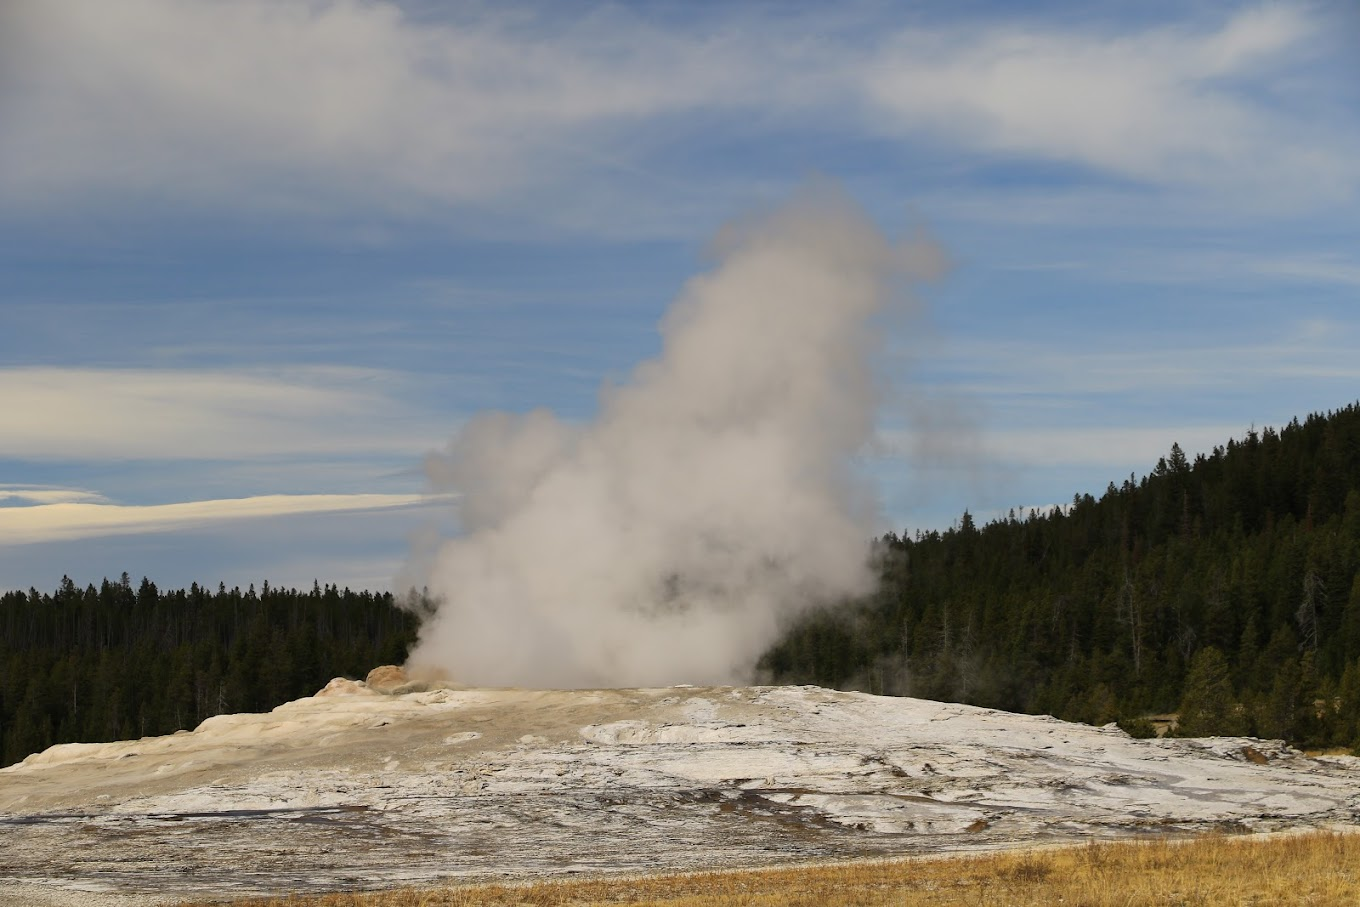



In [6]:
# cargamos los datos:
x = np.array([79, 54, 74, 62, 85, 55, 88])
y = np.array([3.6, 1.8, 3.333, 2.283, 4.533, 2.883, 4.7])

f = reglineal(x, y)

print(f)


 
0.07169 x - 1.786


En este caso: $\alpha^* = -1.786$, $\beta^* = 0.07169$

A partir de esta funcion de ajuste podemos predecir la duracion de la siguiente erupcion si pasaron entre esta y la anterior 80 min:

$$
\hat{y} = -1.786 + 0.07169*80
$$

In [8]:
print("la duracion de esta erupcion, dado que pasaron 80 min desde la ultima es: f(80) = ", f(80))

la duracion de esta erupcion, dado que pasaron 80 min desde la ultima es: f(80) =  3.9498197393822405


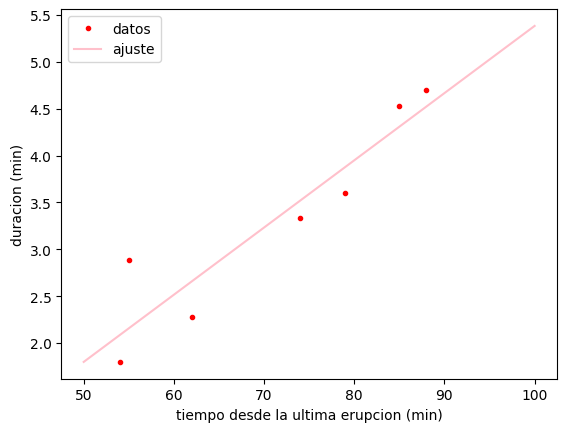

In [12]:
# ploteamos los datos y la funcion de ajuste:
grilla = np.linspace(start = 50, stop = 100, num = 100)


plt.plot(x, y, ".", label = "datos", color = "red")
plt.plot(grilla, f(grilla), label = "ajuste", color = "pink")
plt.ylabel("duracion (min)")
plt.xlabel("tiempo desde la ultima erupcion (min)")
plt.legend()
plt.show()


Consideremos el mismo problema, solo que ahora tenemos muchos mas datos y estos estan guardados en un archivo con algun formato, por ejemplo **.txt** (archivo de texto) o **.csv** (comma separated values)

En este caso vamos a usar la libreria <font color = "magenta"> pandas </font> de python que nos permite leer el archivo y convertirlo en una "tabla de datos", un dato del estilo <em> data frame</em>

El archivo puede ser leido desde un url (direccion de un sitio en internet) o puede estar guardado en la compu y accedemos a el con su nombre. 

Lo hacemos de ambas formas:

In [ ]:
url = 